<a href="https://colab.research.google.com/github/daehkim/RL-lecture/blob/master/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [0]:
def rargmax(vector):
  """ Argmax that chooses randomly among eligible maximum indices."""
  m = np.amax(vector)
  indices = np.nonzero(vector == m)[0]
  return pr.choice(indices)

In [5]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 
            'is_slippery': False}
)


Error: ignored

In [0]:
env = gym.make('FrozenLake-v3')

In [0]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) # status x num of actions
# Set learning parameters
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
  # Reset environment and get first new observation
  state = env.reset()
  rAll = 0
  done = False

  # The Q-Table learning algorithm
  while not done:
    action = rargmax(Q[state, :]) # find the action which will give maximum reward. If the rewards are same, choose randomly

    # Get new state and reward from environment
    new_state, reward, done, _ = env.step(action) # Do the action and get the information

    # Update Q-Table with new knowledge using learning rate
    Q[state, action] = reward + np.max(Q[new_state, :])

    rAll += reward
    state = new_state

  rList.append(rAll) # 각각 2000번의 시도동안 몇번 성공했는지 리스트에 나온다.


Success rate: 0.922
Final Q-table Values
LEFT DOWN RIGHT UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


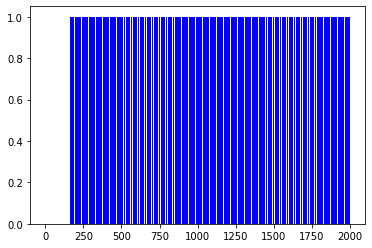

In [8]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()